In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
scale_y = 15         #1 meter in real world coordinates
scale_x = 15.25      #1 meter in real world coordinates actually 15.25

## In simulations I will know the full size of the warehouse/factory etc but in real world
## this might not be easily available or accurate.
path5 = "factory_imgs/camera5.png"
path4 = "factory_imgs/camera4.png"
test_path1 = "factory_imgs/box_of_2_camera1.png"
test_path2 = "factory_imgs/box_of_2_camera2.png"
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)
test_img1 = cv2.imread(test_path1)
test_img2 = cv2.imread(test_path2)
img_rgb5 =cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
img_rgb4 =cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

In [51]:
#camera positions
cam_positions = np.array([(-1,-2),(-1,-1),(-1,0),(-1,1),(-1,2),(0,-2),(0,-1),(0,0),(0,1),(0,2),(1,-2),(1,-1),(1,0),(1,1),(1,2)])
cam_spacing = np.full(cam_positions.shape[0],10)     #because spacing is 10m and even among all cameras

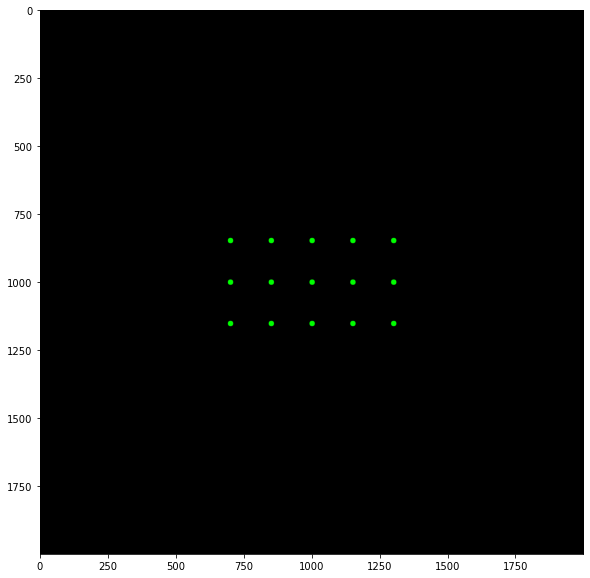

In [162]:
#create an image
img_h = 2000
img_w = 2000
base_image = np.zeros((img_h,img_w,3),dtype=np.uint8)
#camera positions
cam_positions = np.array([(-1,-2),(-1,-1),(-1,0),(-1,1),(-1,2),(0,-2),(0,-1),(0,0),(0,1),(0,2),(1,-2),(1,-1),(1,0),(1,1),(1,2)])
cam_spacing = np.full(cam_positions.shape[0],10)     #because spacing is 10m and even among all cameras
#Knowing the distances b/n cameras as well as camera locations
#my specific camera setup is a 3 row by 5 column setup. with 10m spacing

# cam_y = [-1, 0, 1]   #camera x direction setup
# cam_x = [-2,-1, 0, 1, 2]   #camera y direction setup
## you can also put the locations in a list instead ..eg (-1,1),(0,0).. and iterate through the list


# cam_row = 3        #3 cameras in a row
# cam_col = 5        #5 cameras in a column
# spacing = 10      #real world spacing of 10m for all cameras
#if the spacing isn't uniform, have the distances as a list as well starting from a reference point..eg..[0,2,5..etc
# 0 for the reference camera..2m for the next( the camera is 2m away from the reference camera), 5 for next camera.
# 0m in this case could be (0,0)cam_x,cam_y...


#save cam locations in image space

# for i in cam_y:
#     for j in cam_x:
#         #start plot from center of image
#         base_h = int(j*spacing*scale_x + img_h/2)
#         base_w = int(i*spacing*scale_y + img_w/2)
#         cam_loc.append([base_h,base_w])
#         #Draw circle
#         cv2.circle(base_image,(base_h,base_w),10,(255,0,0),-1)
        
# plt.figure(figsize=(10,10))
# plt.imshow(base_image)
cam_locations = cam_positions*spacing*(scale_x,scale_y) + (img_w/2,img_h/2)
cam_locations = np.fliplr(cam_locations)
for px,py in cam_locations:
    px,py = int(px),int(py)
    cv2.circle(base_image,(px,py),10,(0,255,0),-1)
    
    
# x = int(cam_locations[1,0])
# y = int(cam_locations[1,1])
# cv2.circle(base_image,(x,y),10,(255,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(base_image)   

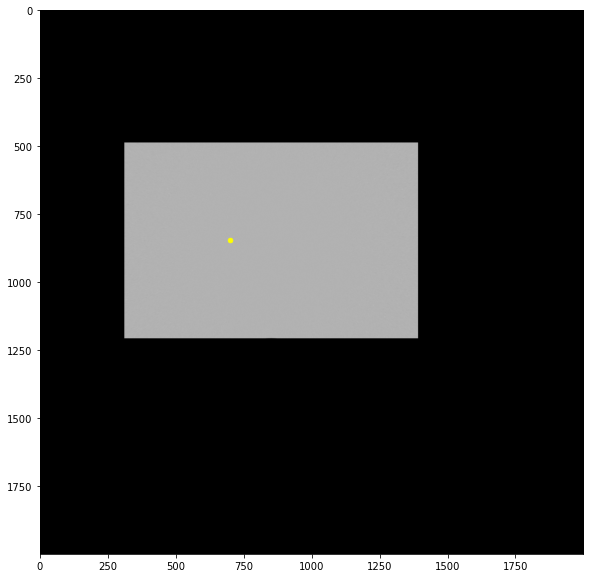

In [166]:
## offset_x and offset_y start from center point of the added image and move according to the "spacing*scale"
base_copy = base_image.copy()

# offset_x = int(cam_locations[0,0] - img5.shape[1]/2)  #put the center of the image on the dot made
# offset_y = int(cam_locations[0,1] - img5.shape[0]/2)
# y1,y2 = offset_y,offset_y + img5.shape[0]
# x1,x2 = offset_x,offset_x + img5.shape[1]
# base_copy[y1:y2,x1:x2] = img_rgb5



offset_x = int(cam_locations[1,0] - img5.shape[1]/2)
offset_y = int(cam_locations[1,1] - img5.shape[0]/2)
y1,y2 = offset_y,offset_y + img4.shape[0]
x1,x2 = offset_x,offset_x + img4.shape[1]
base_copy[y1:y2,x1:x2] = test_img1

x = int(cam_locations[0,0])
y = int(cam_locations[0,1])
xx = int(cam_locations[1,0])
yy = int(cam_locations[1,1])
# cv2.circle(base_copy,(xx,yy),10,(255,255,0),-1)
cv2.circle(base_copy,(x,y),10,(255,255,0),-1)
plt.figure(figsize=(10,10))
plt.imshow(base_copy)
# base_resize = cv2.resize(base_copy,(600,600))
# cv2.imshow("frame",base_resize)
# cv2.waitKey(0)